In [208]:
import pandas as pd
import numpy as np
import plotly.express as px
import xgboost as xgb
import re
import pycaret
from pycaret.classification import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [64]:
df_22_23 = pd.read_csv('../nss_capstone/nba_odds_22_23.csv')#.drop(columns = 'Unnamed: 0').fillna('')
df_22_23 = df_22_23.iloc[::-1]

In [65]:
df_22_23

,Date,Rot,VH,Team,1st,2nd,3rd,4th,Final,Open,Close,ML,2H
1327,116,518,H,LALakers,37,36,29,38,140,0.5,7.5,-280,pk
1326,116,517,V,Houston,35,26,37,34,132,234.5,236.5,240,116
1325,116,516,H,Memphis,29,39,39,29,136,10,12.5,-800,6.5
1324,116,515,V,Phoenix,36,29,23,18,106,225.5,231.0,550,118
1323,116,514,H,Minnesota,27,31,37,30,125,0.5,4.0,-175,pk
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1019,505,V,Washington,36,24,27,27,114,2,2.5,-135,111.5
3,1018,504,H,GoldenState,25,34,32,32,123,6.5,7.5,-310,2
2,1018,503,V,LALakers,22,30,19,38,109,229.5,223.5,260,114
1,1018,502,H,Boston,24,39,35,28,126,7,3.0,-155,2


In [3]:
 df_22_23.to_csv('../nss_capstone/df_22_23.csv')

In [9]:
#  nba_odds_train = pd.concat(
#      map(pd.read_csv,[ 
#                      '../nss_capstone/df_17_18.csv',
#                      '../nss_capstone/df_16_17.csv',
#                      '../nss_capstone/df_15_16.csv',
#                      '../nss_capstone/df_14_15.csv',
#                      '../nss_capstone/df_13_14.csv',
#                      '../nss_capstone/df_12_13.csv',
#                      '../nss_capstone/df_11_12_lockout.csv',
#                      '../nss_capstone/df_10_11.csv',
#                      '../nss_capstone/df_09_10.csv',
#                      '../nss_capstone/df_08_09.csv',
#                      '../nss_capstone/df_07_08.csv']), ignore_index = True)    
                          


In [37]:
# pd.read_csv('../nss_capstone/df_18_19.csv').drop(columns = 'Unnamed: 0').fillna('')

In [20]:
# nba_odds_test = pd.concat(
#     map(pd.read_csv,[
#                      '../nss_capstone/df_21_22.csv',
#                      '../nss_capstone/df_18_19.csv'
                     
#     ])).drop(columns = 'Unnamed: 0').fillna('')

In [22]:
#nba_odds_test

In [10]:
#nba_odds_test.to_csv('../nss_capstone/nba_odds_test.csv')

Gradient Boost

In [111]:
df_train = pd.read_csv('../nss_capstone/nba_odds_train.csv').drop(columns =  ['Unnamed: 0.1','Unnamed: 0']).fillna(0)

In [112]:
df_train['W/L_bool'] = ''

for i in range(0, len(df_train), 2):
    if df_train.iloc[i]['Final'] > df_train.iloc[i+1]['Final']:
        df_train.at[i, 'W/L_bool'] = '1'
        df_train.at[i+1, 'W/L_bool'] = '0'
    else:
        df_train.at[i, 'W/L_bool'] = '0'
        df_train.at[i+1, 'W/L_bool'] = '1'

In [113]:
df_train

,Date,Rot,VH,Team,1st,2nd,3rd,4th,Final,Open,Close,ML,2H,Open Total,Close Total,Open Spread,Close Spread,W/L,W/L_bool
0,2018-06-08,508,H,Cleveland,25,27,13,20,85,216.0,216.5,155.0,107.0,216.0,216.5,0.0,0.0,L,0
1,2018-06-08,507,V,GoldenState,34,27,25,22,108,5.5,4.5,-180.0,1.0,0.0,0.0,5.5,4.5,W,1
2,2018-06-06,506,H,Cleveland,29,29,23,21,102,217.5,216.0,130.0,107.0,217.5,216.0,0.0,0.0,L,0
3,2018-06-06,505,V,GoldenState,28,24,31,27,110,5.0,3.0,-150.0,5.0,0.0,0.0,5.0,3.0,W,1
4,2018-06-03,504,H,GoldenState,32,27,31,32,122,12.5,11.5,-600.0,3.5,0.0,0.0,12.5,11.5,W,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28413,2007-10-30,505,V,Houston,16,27,27,25,95,2.5,5.0,-230.0,3,0.0,0.0,2.5,5.0,W,1
28414,2007-10-30,504,H,GoldenState,30,21,21,24,96,3.0,1.0,-120.0,3,0.0,0.0,3.0,1.0,L,0
28415,2007-10-30,503,V,Utah,28,34,24,31,117,214.5,212.0,100.0,105.5,214.5,212.0,0.0,0.0,W,1
28416,2007-10-30,502,H,SanAntonio,29,30,22,25,106,12.5,13.0,-1400.0,5,0.0,0.0,12.5,13.0,W,1


TRAIN MODEL

In [114]:
variables = ['ML',
             'Open Total',
             'Close Total',
            'Open Spread',
            'Close Spread']

X = df_train[variables]

y = df_train['W/L_bool']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 321, stratify = y)

gbr = GradientBoostingClassifier(n_estimators = 1000).fit(X_train, y_train)

In [115]:
gbr.predict_proba(X_test)

array([[0.3807288 , 0.6192712 ],
       [0.30206553, 0.69793447],
       [0.35896077, 0.64103923],
       ...,
       [0.80725784, 0.19274216],
       [0.80514789, 0.19485211],
       [0.84332604, 0.15667396]])

In [116]:
print(classification_report(y_test, gbr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.68      0.66      0.67      3553
           1       0.67      0.69      0.68      3552

    accuracy                           0.68      7105
   macro avg       0.68      0.68      0.68      7105
weighted avg       0.68      0.68      0.68      7105



In [117]:
accuracy_score(y_test, gbr.predict(X_test))

0.6782547501759324

TEST MODEL

In [124]:
df_test = pd.read_csv('../nss_capstone/nba_odds_test.csv').drop(columns =  'Unnamed: 0').fillna(0)

In [125]:
df_test

,Date,Rot,VH,Team,1st,2nd,3rd,4th,Final,Open,Close,ML,2H,Open Total,Close Total,Open Spread,Close Spread,W/L
0,2022-06-16,528,H,Boston,22,17,27,24,90,2.5,4.0,-175,5.5,0.0,0.0,2.5,4.0,L
1,2022-06-16,527,V,Golden State,27,27,22,27,103,212.5,211.5,155,103.5,212.5,211.5,0.0,0.0,W
2,2022-06-13,526,H,Golden State,27,24,24,29,104,3.5,4.0,-165,107.5,0.0,0.0,3.5,4.0,W
3,2022-06-13,525,V,Boston,16,23,35,20,94,212.5,211.0,145,2.5,212.5,211.0,0.0,0.0,L
4,2022-06-10,524,H,Boston,28,26,24,19,97,2.5,4.0,-165,1,0.0,0.0,2.5,4.0,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5265,2018-10-17,701,V,Memphis,16,23,19,25,83,209.0,204.5,263,1.0,209.0,204.5,0.0,0.0,L
5266,2018-10-16,504,H,GoldenState,31,26,26,25,108,11.5,12.0,-1100,4.5,0.0,0.0,11.5,12.0,W
5267,2018-10-16,503,V,OklahomaCity,23,24,32,21,100,223.5,220.5,711,108.5,223.5,220.5,0.0,0.0,L
5268,2018-10-16,502,H,Boston,21,26,30,28,105,5.0,4.5,-200,1.0,0.0,0.0,5.0,4.5,W


In [126]:
df_test['W/L_bool'] = ''

for i in range(0, len(df_test), 2):
    if df_test.iloc[i]['Final'] > df_test.iloc[i+1]['Final']:
        df_test.at[i, 'W/L_bool'] = '1'
        df_test.at[i+1, 'W/L_bool'] = '0'
    else:
        df_test.at[i, 'W/L_bool'] = '0'
        df_test.at[i+1, 'W/L_bool'] = '1'

In [127]:
# df_add_test = pd.concat([df_train, df_test], axis=0)

In [128]:
X_test = df_test[variables]
y_test = df_test['W/L_bool']

In [129]:
y_pred_test = gbr.predict(X_test)

In [130]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.67      0.62      0.64      2635
           1       0.65      0.70      0.67      2635

    accuracy                           0.66      5270
   macro avg       0.66      0.66      0.66      5270
weighted avg       0.66      0.66      0.66      5270



TRAIN XGBOOST

In [171]:
df_xg_train = pd.read_csv('../nss_capstone/nba_odds_train.csv').drop(columns =  ['Unnamed: 0.1','Unnamed: 0']).fillna(0)

In [172]:
df_xg_train['W/L_bool'] = ''

for i in range(0, len(df_xg_train), 2):
    if df_xg_train.iloc[i]['Final'] > df_xg_train.iloc[i+1]['Final']:
        df_xg_train.at[i, 'W/L_bool'] = '1'
        df_xg_train.at[i+1, 'W/L_bool'] = '0'
    else:
        df_xg_train.at[i, 'W/L_bool'] = '0'
        df_xg_train.at[i+1, 'W/L_bool'] = '1'

In [173]:
variables = ['ML',
             'Open Total',
             'Close Total',
            'Open Spread',
            'Close Spread']

X = df_xg_train[variables]

y = df_xg_train['W/L_bool'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 321, stratify = y)

xgboost_model = xgb.XGBClassifier(n_estimators=1000)
xgboost_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)

In [174]:
y_pred = xgboost_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.61      0.64      3553
           1       0.64      0.71      0.67      3552

    accuracy                           0.66      7105
   macro avg       0.66      0.66      0.66      7105
weighted avg       0.66      0.66      0.66      7105



TEST XGBOOST

In [175]:
df_xg_test = pd.read_csv('../nss_capstone/nba_odds_test.csv').drop(columns =  'Unnamed: 0').fillna(0)

In [176]:
df_xg_test['W/L_bool'] = ''

for i in range(0, len(df_xg_test), 2):
    if df_xg_test.iloc[i]['Final'] > df_xg_test.iloc[i+1]['Final']:
        df_xg_test.at[i, 'W/L_bool'] = '1'
        df_xg_test.at[i+1, 'W/L_bool'] = '0'
    else:
        df_xg_test.at[i, 'W/L_bool'] = '0'
        df_xg_test.at[i+1, 'W/L_bool'] = '1'

In [177]:
X_test = df_xg_test[variables]
y_test = df_xg_test['W/L_bool'].astype(int)

In [178]:
y_pred = xgboost_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.56      0.61      2635
           1       0.62      0.71      0.66      2635

    accuracy                           0.64      5270
   macro avg       0.64      0.64      0.64      5270
weighted avg       0.64      0.64      0.64      5270



Random Forest Train

In [189]:
df_rf_train = pd.read_csv('../nss_capstone/nba_odds_train.csv').drop(columns =  ['Unnamed: 0.1','Unnamed: 0']).fillna(0)

In [190]:
df_rf_train['W/L_bool'] = ''

for i in range(0, len(df_rf_train), 2):
    if df_rf_train.iloc[i]['Final'] > df_rf_train.iloc[i+1]['Final']:
        df_rf_train.at[i, 'W/L_bool'] = '1'
        df_rf_train.at[i+1, 'W/L_bool'] = '0'
    else:
        df_rf_train.at[i, 'W/L_bool'] = '0'
        df_rf_train.at[i+1, 'W/L_bool'] = '1'

In [191]:
variables = ['ML', 'Open Total', 'Close Total', 'Open Spread', 'Close Spread']

X = df_rf_train[variables]
y = df_rf_train['W/L_bool'].astype(int)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=321, stratify=y)

# Train the Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.63      0.64      2842
           1       0.64      0.67      0.66      2842

    accuracy                           0.65      5684
   macro avg       0.65      0.65      0.65      5684
weighted avg       0.65      0.65      0.65      5684



Random Forest Test

In [192]:
df_rf_test = pd.read_csv('../nss_capstone/nba_odds_test.csv').drop(columns =  'Unnamed: 0').fillna(0)

In [193]:
df_rf_test['W/L_bool'] = ''

for i in range(0, len(df_rf_test), 2):
    if df_rf_test.iloc[i]['Final'] > df_rf_test.iloc[i+1]['Final']:
        df_rf_test.at[i, 'W/L_bool'] = '1'
        df_rf_test.at[i+1, 'W/L_bool'] = '0'
    else:
        df_rf_test.at[i, 'W/L_bool'] = '0'
        df_rf_test.at[i+1, 'W/L_bool'] = '1'

In [194]:
X_test = df_rf_test[variables]
y_test = df_rf_test['W/L_bool'].astype(int)

In [195]:
y_pred_test = random_forest.predict(X_test)

In [196]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.63      0.61      0.62      2635
           1       0.62      0.65      0.63      2635

    accuracy                           0.63      5270
   macro avg       0.63      0.63      0.63      5270
weighted avg       0.63      0.63      0.63      5270



NAIVE BAYES

In [210]:

# Read in the data
df_nb_train = pd.read_csv('../nss_capstone/nba_odds_train.csv').drop(columns=['Unnamed: 0.1', 'Unnamed: 0']).fillna(0)

# Create the boolean column for wins and losses
df_nb_train['W/L_bool'] = ''
for i in range(0, len(df_nb_train), 2):
    if df_nb_train.iloc[i]['Final'] > df_nb_train.iloc[i + 1]['Final']:
        df_nb_train.at[i, 'W/L_bool'] = '1'
        df_nb_train.at[i + 1, 'W/L_bool'] = '0'
    else:
        df_nb_train.at[i, 'W/L_bool'] = '0'
        df_nb_train.at[i + 1, 'W/L_bool'] = '1'

# Define the variables and target variable
variables = ['ML', 'Open Total', 'Close Total', 'Open Spread', 'Close Spread']
X_nb = df_nb_train[variables]
y_nb = df_nb_train['W/L_bool'].astype(int)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_nb, y_nb, test_size=0.2, random_state=321, stratify=y)

# Train the Naive Bayes Classifier
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Make predictions on the test set
y_nb_pred = naive_bayes.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_nb_pred))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70      2842
           1       0.71      0.63      0.67      2842

    accuracy                           0.68      5684
   macro avg       0.69      0.68      0.68      5684
weighted avg       0.69      0.68      0.68      5684



In [212]:
df_nb_test = pd.read_csv('../nss_capstone/nba_odds_test.csv').drop(columns =  'Unnamed: 0').fillna(0)


df_nb_test['W/L_bool'] = ''

for i in range(0, len(df_nb_test), 2):
    if df_nb_test.iloc[i]['Final'] > df_nb_test.iloc[i+1]['Final']:
        df_nb_test.at[i, 'W/L_bool'] = '1'
        df_nb_test.at[i+1, 'W/L_bool'] = '0'
    else:
        df_nb_test.at[i, 'W/L_bool'] = '0'
        df_nb_test.at[i+1, 'W/L_bool'] = '1'
        

X_nb_test = df_nb_test[variables]
y_nb_test = df_nb_test['W/L_bool'].astype(int)


y_pred_nb_test = naive_bayes.predict(X_nb_test)

print(classification_report(y_nb_test, y_pred_nb_test))

              precision    recall  f1-score   support

           0       0.65      0.73      0.69      2635
           1       0.69      0.61      0.65      2635

    accuracy                           0.67      5270
   macro avg       0.67      0.67      0.67      5270
weighted avg       0.67      0.67      0.67      5270



PYCARET FOR MODEL SELECTION

In [207]:
exp_clf = setup(data=df_xg_train, target='W/L_bool', train_size=0.8)
best_model = compare_models()

,Description,Value
0,Session id,8786
1,Target,W/L_bool
2,Target type,Binary
3,Target mapping,"0: 0, 1: 1"
4,Original data shape,"(28418, 19)"
5,Transformed data shape,"(28418, 21)"
6,Transformed train set shape,"(22734, 21)"
7,Transformed test set shape,"(5684, 21)"
8,Ordinal features,1
9,Numeric features,13


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,1.0000,1.0000,1.0000,0.9999,1.0000,0.9999,0.9999,0.1850
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,0.9999,1.0000,0.9999,0.9999,0.1920
ridge,Ridge Classifier,1.0000,0.0000,1.0000,0.9999,1.0000,0.9999,0.9999,0.1790
rf,Random Forest Classifier,1.0000,1.0000,1.0000,0.9999,1.0000,0.9999,0.9999,0.3040
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,0.9999,1.0000,0.9999,0.9999,0.2840
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,0.9999,1.0000,0.9999,0.9999,0.4520
et,Extra Trees Classifier,1.0000,1.0000,1.0000,0.9999,1.0000,0.9999,0.9999,0.2800
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,0.9999,1.0000,0.9999,0.9999,0.2860
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,0.9999,1.0000,0.9999,0.9999,0.3080
lr,Logistic Regression,0.9999,1.0000,0.9999,0.9999,0.9999,0.9998,0.9998,0.8210


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Pycaret

In [142]:
df = pd.read_csv('../nss_capstone/nba_odds_train.csv').drop(columns=['Unnamed: 0.1', 'Unnamed: 0']).fillna(0)

In [145]:
exp_clf = setup(data=df, target='W/L', train_size=0.8)

,Description,Value
0,Session id,241
1,Target,W/L
2,Target type,Binary
3,Target mapping,"L: 0, W: 1"
4,Original data shape,"(28418, 18)"
5,Transformed data shape,"(28418, 20)"
6,Transformed train set shape,"(22734, 20)"
7,Transformed test set shape,"(5684, 20)"
8,Numeric features,13
9,Categorical features,4


In [147]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7911,0.8739,0.7853,0.7946,0.7899,0.5821,0.5822,0.3810
et,Extra Trees Classifier,0.7884,0.8720,0.7839,0.7911,0.7874,0.5768,0.5770,0.3570
gbc,Gradient Boosting Classifier,0.7862,0.8645,0.7888,0.7849,0.7867,0.5724,0.5726,0.4600
lr,Logistic Regression,0.7784,0.8639,0.7667,0.7852,0.7757,0.5568,0.5571,1.0500
lda,Linear Discriminant Analysis,0.7776,0.8632,0.7580,0.7890,0.7731,0.5552,0.5558,0.0880
ridge,Ridge Classifier,0.7775,0.0000,0.7580,0.7889,0.7730,0.5550,0.5556,0.0640
ada,Ada Boost Classifier,0.7693,0.8381,0.7949,0.7561,0.7750,0.5386,0.5394,0.1890
knn,K Neighbors Classifier,0.7176,0.7794,0.7284,0.7131,0.7206,0.4352,0.4354,0.4520
nb,Naive Bayes,0.7095,0.8070,0.6668,0.7292,0.6965,0.4189,0.4206,0.0700
dt,Decision Tree Classifier,0.7023,0.7023,0.7246,0.6937,0.7087,0.4045,0.4051,0.0880


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [148]:
tuned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7757,0.8615,0.7687,0.7797,0.7741,0.5515,0.5515
1,0.7854,0.8797,0.7757,0.7910,0.7833,0.5708,0.5709
2,0.7832,0.8676,0.7467,0.8055,0.7750,0.5664,0.5679
3,0.7682,0.8533,0.7458,0.7808,0.7629,0.5365,0.5370
4,0.7783,0.8689,0.7553,0.7915,0.7730,0.5565,0.5571
5,0.7695,0.8521,0.7535,0.7782,0.7657,0.5389,0.5392
6,0.7681,0.8501,0.7544,0.7756,0.7648,0.5363,0.5365
7,0.7787,0.8489,0.7520,0.7946,0.7727,0.5574,0.5582
8,0.7756,0.8622,0.7546,0.7879,0.7709,0.5513,0.5518


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

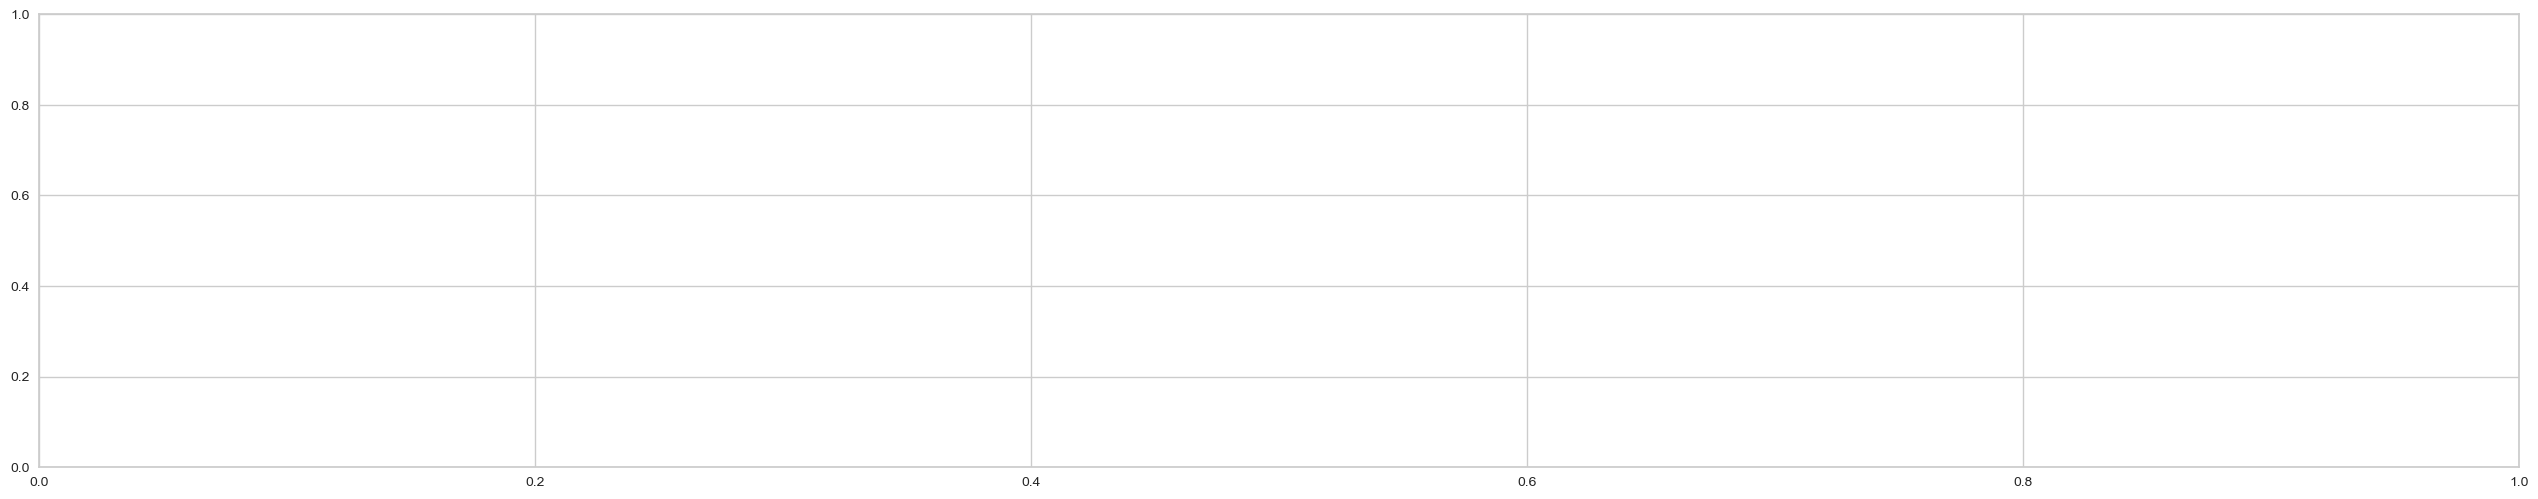

In [149]:
evaluate_model(tuned_model)